# Plot scores per gridpoint

In [11]:
import os, yaml
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy as ctp

import hyblim.geoplot as gpl
plt.style.use("../../paper.mplstyle")

def get_model_specs_by_name(experiments, exp_name):
    for exp in experiments:
        if exp['name'] == exp_name:
            return exp 
    return None

# Load list of experiments
with open("experiments.yaml", "r") as f:
    experiment_coll = yaml.safe_load(f)

## Load score

In [38]:
experiments = ['LIM', 'LSTM', 'LIM+LSTM']
datasplit = 'test'
scorekey = 'crpss'

score_dict = {}
for exp_name in experiments:
    nino_scores_exp, nino_scores_month_exp, num_traindata = [], [], []
    exp = get_model_specs_by_name(experiment_coll, f"{exp_name}")
    if exp is None:
        print(f"Experiment {exp_name} not found")
        continue
    score_map = xr.open_dataset(exp['paths'][0] + f'/metrics/gridscore_{scorekey}_{datasplit}.nc')
    score_dict[exp_name] = score_map

## Plot score

Text(0.5, 0.98, '$\\tau$ = 9')

/home/ecm1922/Code/hybridLIM/.venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/ecm1922/Code/hybridLIM/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


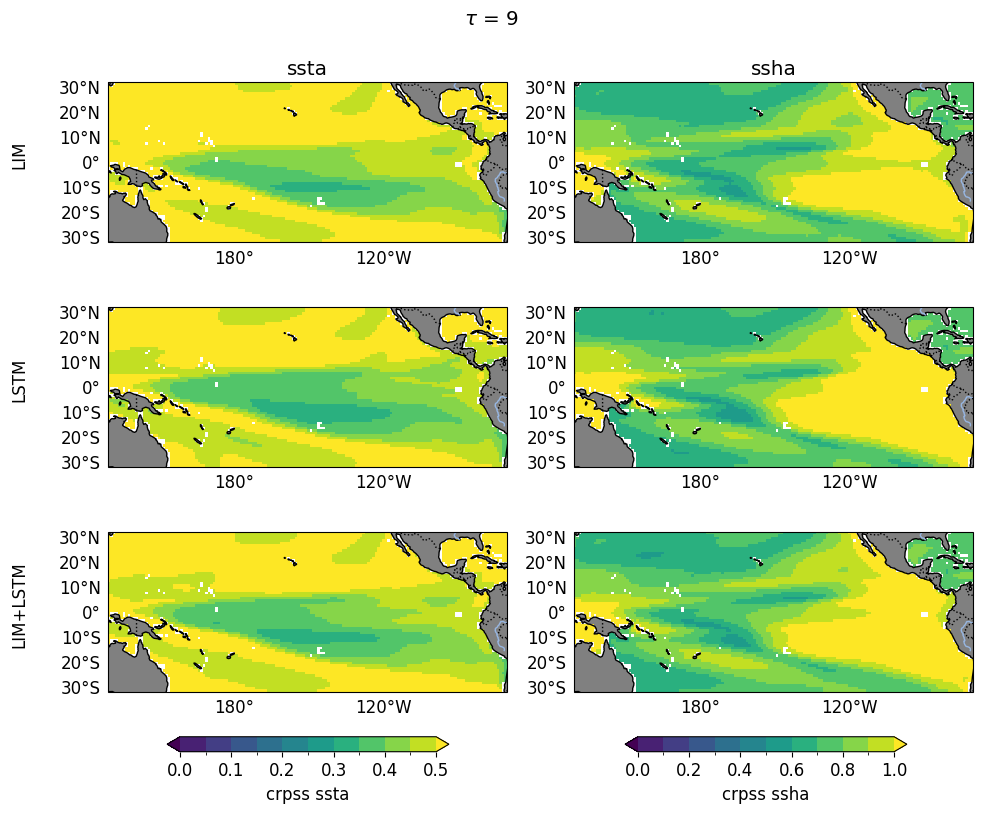

In [42]:
# Plotting
lag = 9
vars = ['ssta', 'ssha']
plparam  = {
    'mse' : {'ssta': dict(cmap='plasma', vmin=0, vmax=1.5, eps=0.25),
             'ssha': dict(cmap='plasma', vmin=0, vmax=150, eps=10)},
    'rmsess' : {'ssta': dict(cmap='plasma_r', vmin=-.1, vmax=.9, eps=0.1),
                    'ssha': dict(cmap='plasma_r', vmin=-.1, vmax=.9, eps=0.1)},
    'cc' : {'ssta': dict(cmap='RdBu_r', vmin=-1, vmax=1, eps=0.1, centercolor="#FFFFFF"),
            'ssha': dict(cmap='RdBu_r', vmin=-1, vmax=1, eps=0.1, centercolor="#FFFFFF")},
    'crpss' : {'ssta': dict(cmap='viridis', vmin=0, vmax=.5, eps=0.05),
              'ssha': dict(cmap='viridis', vmin=0, vmax=1.0, eps=.1)},
}


ncols = len(vars)
nrows = len(experiments)
fig = plt.figure(figsize=(ncols*5, nrows*2.5))

for j, var in enumerate(vars):
    for i, exp_name in enumerate(experiments):
        score = score_dict[exp_name][var]
        ax = fig.add_subplot(nrows, ncols, i*ncols+j+1, projection=ctp.crs.PlateCarree(central_longitude=180))
        im = gpl.plot_map(score.sel(lag=lag), ax=ax, **plparam[scorekey][var], add_bar=False)

        if i == 0:
            ax.set_title(f"{var}")
        if j == 0:
            ax.text(-0.2, 0.55, f"{exp_name}", va='bottom', ha='center',
                    rotation='vertical', rotation_mode='anchor',
                    transform=ax.transAxes)
        
    # Colorbar under each column
    axwidth = ax.get_position().width
    cbar_ax = fig.add_axes([ 0.5 * axwidth + j * (axwidth*1.3), -0.01, 0.8*axwidth, 0.02])
    cb = fig.colorbar(im['im'], cax=cbar_ax, orientation='horizontal', extend='both')
    cb.set_label(label=rf"{scorekey} {vars[j]}")

# Title
fig.suptitle(rf"$\tau$ = {lag}")
